In [1]:
import os

import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

import src.dataset.utils as dutils
import src.modelling.utils as mutils
from src.modelling.resnet_model import ResNet

%load_ext autoreload
%autoreload 2

In [2]:
DATA_DIR = "./data/"
BATCH_SIZE = 10
EPOCHS = 8
MAX_LR = 0.01
GRAD_CLIP = 0.1
WEIGHT_DECAY = 1e-4

In [3]:
image_transformer = dutils.get_default_image_transformer()

train_loader = DataLoader(
    dataset=ImageFolder(os.path.join(DATA_DIR, "train"), transform=image_transformer),
    batch_size=BATCH_SIZE,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
)

valid_loader = DataLoader(
    dataset=ImageFolder(os.path.join(DATA_DIR, "valid"), transform=image_transformer),
    batch_size=BATCH_SIZE,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
)

test_loader = DataLoader(
    dataset=ImageFolder(os.path.join(DATA_DIR, "test"), transform=image_transformer),
    batch_size=BATCH_SIZE,
    pin_memory=True,
    num_workers=4,
)

In [7]:
from datetime import datetime

opts = {
    "Adam": {
        "object": torch.optim.Adam,
        "history": []
    },
    "SGD": {
        "object": torch.optim.SGD,
        "history": []
    },
    "RMSprop": {
        "object": torch.optim.RMSprop,
        "history": []
    },
}

for opt_name, optimizer in opts.items():
    
    model = ResNet(in_channels=3, n_classes=4)
    opt = optimizer['object'](model.parameters(), lr=MAX_LR, weight_decay=WEIGHT_DECAY)
    
    opts[opt_name]['history'] = mutils.train_model(
        model=model, 
        epochs=EPOCHS,
        train_loader=train_loader,
        valid_loader=valid_loader,
        optimizer=opt,
        max_lr=MAX_LR,
        weight_decay=WEIGHT_DECAY,
        grad_clip=GRAD_CLIP,
    )
    
    mutils.evaluate_model(model=model, loader=test_loader)
    
    model_date = datetime.now().strftime("%Y-%m-%d-%H:%M:%S")
    model_file = f"resnet_{opt_name}_{model_date}.pth"
    model = model.to(torch.device("cpu"))
    torch.save(model.state_dict(), os.path.join('models', model_file))

100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.11it/s]


Epoch [0] | lr: 0.00166 | train loss: 0.7669 | valid loss: 1.5862 | accuracy: 0.6047


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.10it/s]


Epoch [1] | lr: 0.00691 | train loss: 0.9203 | valid loss: 0.4600 | accuracy: 0.8141


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.10it/s]


Epoch [2] | lr: 0.00986 | train loss: 0.7118 | valid loss: 2.7829 | accuracy: 0.5000


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.13it/s]


Epoch [3] | lr: 0.00902 | train loss: 0.6257 | valid loss: 2.3812 | accuracy: 0.6882


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.10it/s]


Epoch [4] | lr: 0.00689 | train loss: 0.5472 | valid loss: 0.6169 | accuracy: 0.7871


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.10it/s]


Epoch [5] | lr: 0.00417 | train loss: 0.4594 | valid loss: 0.3115 | accuracy: 0.8800


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.10it/s]


Epoch [6] | lr: 0.00171 | train loss: 0.4046 | valid loss: 0.3450 | accuracy: 0.8482


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.08it/s]


Epoch [7] | lr: 0.00026 | train loss: 0.3650 | valid loss: 0.2593 | accuracy: 0.9059


100%|██████████████████████████████████████████████████████████████████████████████| 85/85 [00:03<00:00, 24.11it/s]


Accuracy for test set: 0.8887573964497042


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:46<00:00,  8.46it/s]


Epoch [0] | lr: 0.00166 | train loss: 0.6713 | valid loss: 0.6581 | accuracy: 0.6824


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:46<00:00,  8.47it/s]


Epoch [1] | lr: 0.00691 | train loss: 0.9216 | valid loss: 0.3764 | accuracy: 0.8600


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:46<00:00,  8.47it/s]


Epoch [2] | lr: 0.00986 | train loss: 0.7965 | valid loss: 1.2038 | accuracy: 0.7294


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:46<00:00,  8.49it/s]


Epoch [3] | lr: 0.00902 | train loss: 0.7108 | valid loss: 0.3771 | accuracy: 0.8118


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:46<00:00,  8.47it/s]


Epoch [4] | lr: 0.00689 | train loss: 0.5868 | valid loss: 0.7087 | accuracy: 0.7588


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:46<00:00,  8.48it/s]


Epoch [5] | lr: 0.00417 | train loss: 0.4306 | valid loss: 0.7490 | accuracy: 0.7565


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:46<00:00,  8.45it/s]


Epoch [6] | lr: 0.00171 | train loss: 0.3501 | valid loss: 0.2235 | accuracy: 0.9259


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:46<00:00,  8.48it/s]


Epoch [7] | lr: 0.00026 | train loss: 0.2005 | valid loss: 0.1598 | accuracy: 0.9506


100%|██████████████████████████████████████████████████████████████████████████████| 85/85 [00:03<00:00, 24.31it/s]


Accuracy for test set: 0.9313609467455621


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:49<00:00,  8.04it/s]


Epoch [0] | lr: 0.00166 | train loss: 1.4038 | valid loss: 49.1638 | accuracy: 0.4212


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.07it/s]


Epoch [1] | lr: 0.00691 | train loss: 1.1238 | valid loss: 1.3546 | accuracy: 0.5165


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.09it/s]


Epoch [2] | lr: 0.00986 | train loss: 1.4988 | valid loss: 4.1295 | accuracy: 0.5306


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.09it/s]


Epoch [3] | lr: 0.00902 | train loss: 4.3935 | valid loss: 10.2524 | accuracy: 0.5365


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.08it/s]


Epoch [4] | lr: 0.00689 | train loss: 2.6576 | valid loss: 0.9122 | accuracy: 0.7588


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.07it/s]


Epoch [5] | lr: 0.00417 | train loss: 1.8092 | valid loss: 1.9590 | accuracy: 0.5812


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.10it/s]


Epoch [6] | lr: 0.00171 | train loss: 1.1371 | valid loss: 0.4992 | accuracy: 0.7953


100%|████████████████████████████████████████████████████████████████████████████| 395/395 [00:48<00:00,  8.10it/s]


Epoch [7] | lr: 0.00026 | train loss: 0.6268 | valid loss: 0.3783 | accuracy: 0.8671


100%|██████████████████████████████████████████████████████████████████████████████| 85/85 [00:03<00:00, 24.44it/s]


Accuracy for test set: 0.8804733727810651


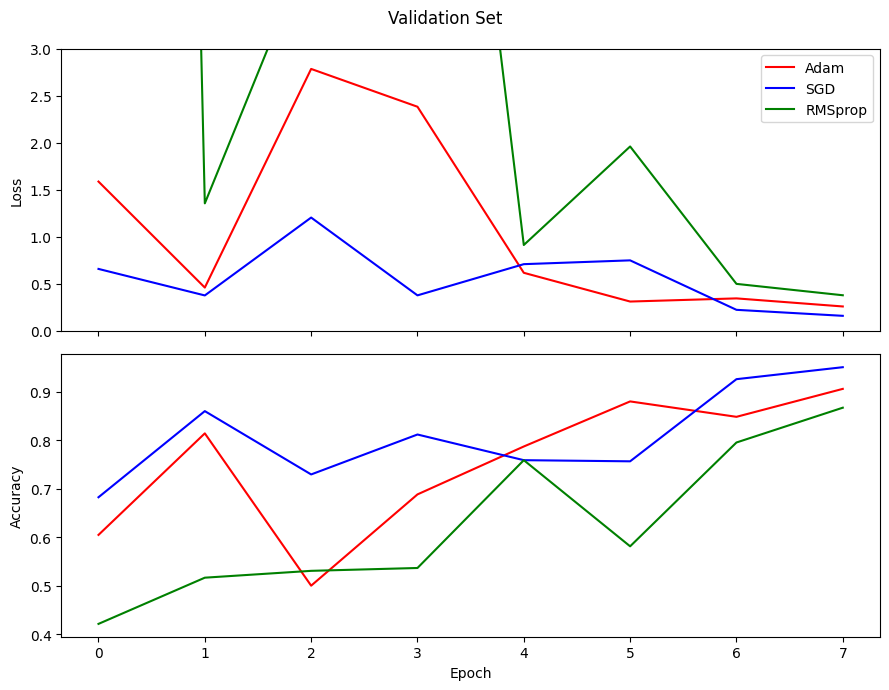

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(9, 7), dpi=100, sharex=True)

colors = {
    'Adam': 'red',
    'SGD': 'blue',
    'RMSprop': 'green',
}

for opt_name in ['Adam', 'SGD', 'RMSprop']:
    valid_losses = [d['valid_loss'] for d in opts[opt_name]['history']]
    valid_accuracy = [d['valid_accuracy'] for d in opts[opt_name]['history']]
    axs[0].plot(valid_losses, color=colors[opt_name], label=opt_name)
    axs[1].plot(valid_accuracy, color=colors[opt_name], label=opt_name)

axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylim(0, 3)
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')

fig.suptitle('Validation Set')
fig.tight_layout()
fig.savefig('./images/learning_curves.png', bbox_inches='tight')